In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Data Wrangling

In [2]:
import numpy as np
import pandas as pd
import scipy as sp

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

#### Exploratory Data Analysis

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.duplicated().sum()

0

Dalam melakukan Exploratory Data Analysis, saya menemukan bahwa tidak ada nilai null yang hadir di dalamnya. Selain itu, tidak ada duplikat data yang terdeteksi setelah saya melakukan pemeriksaan awal. Langkah-langkah ini memberikan kepercayaan bahwa dataset telah bersih dan siap untuk dilanjutkan ke tahap analisis regresi.

#### Model Training

In [8]:
X_reg = df.iloc[:,[2, 3]].values
y_reg = df.iloc[:,4].values

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_reg_train = scaler.fit_transform(X_reg_train)
X_reg_test = scaler.transform(X_reg_test)

In [11]:
model = SVC(kernel='linear', random_state=0)
model.fit(X_reg_train, y_reg_train)

y_reg_pred = model.predict(X_reg_test)
# print(y_reg_pred)

cm = confusion_matrix(y_reg_test, y_reg_pred)
print(cm)

[[66  2]
 [ 8 24]]


- Terdapat 66 prediksi yang benar-benar positif (true positives) dan 2 prediksi yang salah positif (false positives).
- Ada 8 prediksi yang salah negatif (false negatives) dan 24 prediksi yang benar-benar negatif (true negatives).

In [12]:
print(classification_report(y_reg_test, y_reg_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



#### Data Visualization

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

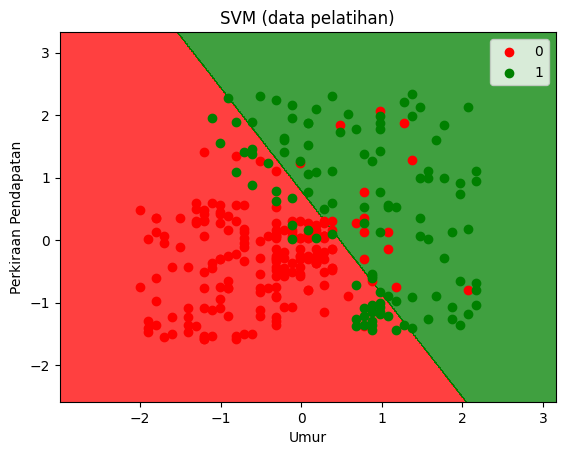

In [14]:
# Visualising the Training set results
X_set, y_set = X_reg_train, y_reg_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (data pelatihan)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Pendapatan')
plt.legend()
plt.show()

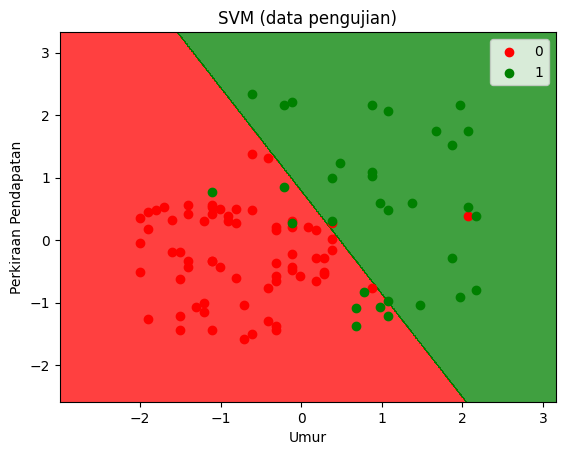

In [15]:
# Visualising the Test set results
X_set, y_set = X_reg_test, y_reg_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (data pengujian)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Pendapatan')
plt.legend()
plt.show()